In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Important Library Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import seaborn

Dataset load

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CSE499/AllData.csv")

In [ ]:
df.head(200)

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person,Class
0,1.560000e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4,Eating
1,1.560000e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4,Eating
2,1.560000e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4,Eating
3,1.560000e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4,Eating
4,1.560000e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4,Eating
...,...,...,...,...,...,...,...,...,...
195,1.560000e+12,-0.415161,0.886719,-0.390259,-4.024390,-3.384146,22.408537,4,Eating
196,1.560000e+12,-0.360596,0.836304,-0.378174,-18.506098,4.451220,3.993902,4,Eating
197,1.560000e+12,-0.408447,0.833862,-0.339233,-17.713415,6.463415,-1.463415,4,Eating
198,1.560000e+12,-0.367920,0.877563,-0.336914,-8.780488,1.615854,8.628049,4,Eating


In [ ]:
df=df.drop('Person',axis=1)
df=df.drop('Time',axis=1)

In [ ]:
df

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Class
0,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,Eating
1,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,Eating
2,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,Eating
3,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,Eating
4,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,Eating
...,...,...,...,...,...,...,...
72089,-0.945923,-0.182861,0.105103,-70.457317,-11.829268,11.463415,Walking
72090,-0.898315,-0.176880,0.078857,-71.280488,-11.890244,10.884146,Walking
72091,-0.863159,-0.199097,0.086548,-71.676829,-19.390244,-1.006098,Walking
72092,-0.904907,-0.189941,0.088989,-58.963415,-10.152439,25.731707,Walking


Dataset shape (Number of row, number of column)

In [ ]:
df.shape

(72094, 7)



```
# This is formatted as code
```

label is the target column which we need to predict

In [ ]:
df['Class'].value_counts()

Speak and Walk    18673
Staying           16453
Walking           14541
Speaking          12867
Eating             9560
Name: Class, dtype: int64

In [ ]:
df.isnull().sum() #find missing data

Acc_x    0
Acc_y    0
Acc_z    0
Gry_x    0
Gry_y    0
Gry_Z    0
Class    0
dtype: int64

In [ ]:
df.isnull().values.any() #no missing data

False

In [ ]:
df.describe() #feature engineering

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
count,72094.000000,72094.000000,72094.000000,72094.000000,72094.000000,72094.000000
mean,-0.447154,0.402126,-0.189126,-2.895353,-0.584548,-0.605051
std,0.572069,0.465418,0.210580,42.258991,41.297331,27.830226
min,-1.283447,-1.066040,-1.184326,-588.658537,-664.634146,-340.792683
25%,-0.863892,-0.031494,-0.349243,-11.615854,-10.091463,-8.864329
50%,-0.743408,0.556519,-0.214478,-5.274390,0.000000,1.006098
75%,-0.036987,0.782440,-0.057495,4.359756,4.756098,8.445122
max,1.146362,1.199951,0.564331,414.878049,625.335366,504.054878


In [ ]:
df.corr() #feature selection

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
Acc_x,1.000000,0.576228,-0.427687,0.047156,0.064115,0.018388
Acc_y,0.576228,1.000000,-0.749424,-0.033066,0.006125,0.054869
Acc_z,-0.427687,-0.749424,1.000000,0.041120,-0.007340,-0.028219
Gry_x,0.047156,-0.033066,0.041120,1.000000,0.114890,-0.113659
Gry_y,0.064115,0.006125,-0.007340,0.114890,1.000000,-0.383033
Gry_Z,0.018388,0.054869,-0.028219,-0.113659,-0.383033,1.000000


Feature Selection heatmap

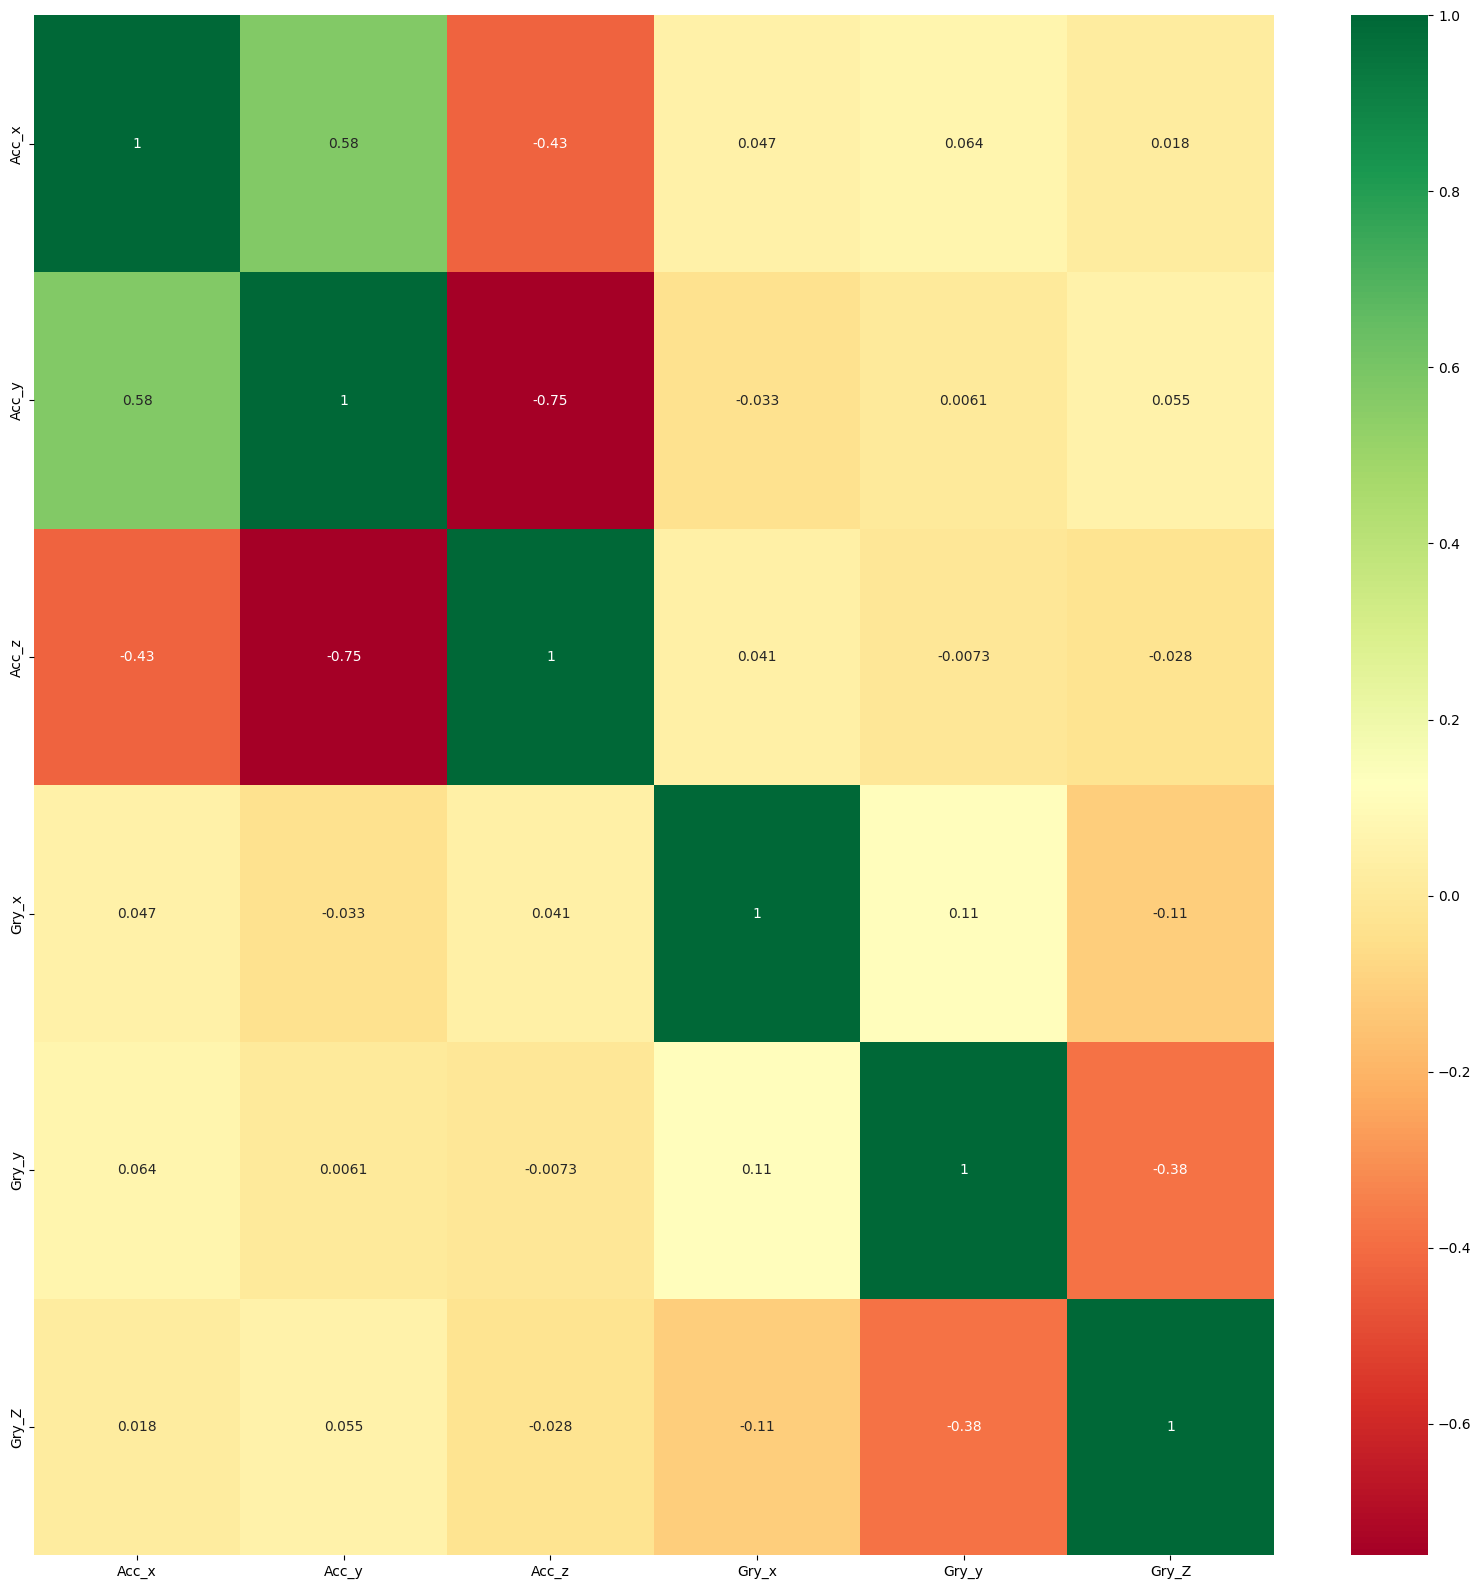

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Extract statistical features

In [ ]:
# Extract the accelerometer and gyroscope data into separate arrays
acc_data = df[['Acc_x', 'Acc_y', 'Acc_z']].values
gyro_data = df[['Gry_x', 'Gry_y', 'Gry_Z']].values


In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
data=df

In [ ]:
# function to compute statistical features
def compute_features(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    min = np.min(data, axis=0)
    max = np.max(data, axis=0)
    rms = np.sqrt(np.mean(np.square(data), axis=0))
    skewness = skew(data, axis=0)
    kurtosis_ = kurtosis(data, axis=0)
    features = []
    for f in [mean, std, (max-min), rms, skewness, kurtosis_]:
        if isinstance(f, float):
            features.append(f)
        else:
            features.extend(f.flatten())
    return features

In [ ]:
# compute features for accelerometer and gyroscope data
acc_features = np.apply_along_axis(compute_features, 1, acc_data)
gyro_features = np.apply_along_axis(compute_features, 1, gyro_data)


In [ ]:
# concatenate accelerometer and gyroscope features
features = np.concatenate([acc_features, gyro_features], axis=1)

In [ ]:
features

array([[ 0.32840983,  0.46974154,  1.11169434, ..., 13.01547207,
         0.54441885, -1.5       ],
       [ 0.33695475,  0.47853898,  1.13879394, ...,  9.86326431,
         0.59937443, -1.5       ],
       [ 0.33589681,  0.47852696,  1.13903809, ...,  7.74330226,
         0.32199616, -1.5       ],
       ...,
       [-0.325236  ,  0.39784353,  0.94970703, ..., 42.87408559,
        -0.51243437, -1.5       ],
       [-0.33528646,  0.41857014,  0.99389649, ..., 37.60264638,
        -0.18429549, -1.5       ],
       [-0.33569336,  0.43961482,  1.02880859, ..., 36.77338206,
        -0.25090006, -1.5       ]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
labels=df['Class']

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15, random_state=42)


In [ ]:
# standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# train and test support vector machine classifier
svm = SVC(kernel='rbf', C=1, gamma='auto')
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test, y_test)

In [ ]:
# train and test random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)

In [ ]:
print('SVM accuracy: {:.3f}'.format(svm_acc))
print('Random forest accuracy: {:.3f}'.format(rf_acc))

SVM accuracy: 0.748
Random forest accuracy: 0.820


In [ ]:
#more library for import
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [ ]:
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [ ]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [ ]:
from sklearn.metrics import confusion_matrix

**Model 2: GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBClassifier

grad_model = GradientBoostingClassifier()
grad_model.fit(X_train_s,y_train)

GradientBoostingClassifier()

In [ ]:
grad_model.score(X_train_s,y_train)

0.775290066743909

In [ ]:
y_pred_grad = grad_model.predict(X_test_s)
print(classification_report(y_test, y_pred_grad))

                precision    recall  f1-score   support

        Eating       0.73      0.75      0.74      1407
Speak and Walk       0.70      0.78      0.74      2826
      Speaking       0.73      0.76      0.74      1996
       Staying       0.94      0.94      0.94      2429
       Walking       0.72      0.57      0.63      2157

      accuracy                           0.77     10815
     macro avg       0.76      0.76      0.76     10815
  weighted avg       0.77      0.77      0.76     10815



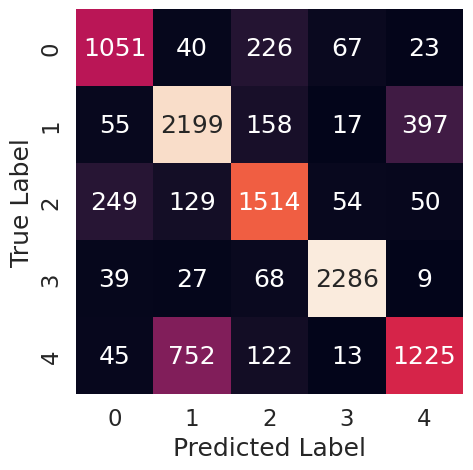

In [ ]:
conf_matrix(y_test, y_pred_grad)

**Model 3: AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train_s,y_train)

AdaBoostClassifier()

In [ ]:
ada.score(X_train_s,y_train)

0.5822059759460827

In [ ]:
y_pred_ada = ada.predict(X_test_s)
print(classification_report(y_test, y_pred_ada))

                precision    recall  f1-score   support

        Eating       0.56      0.57      0.57      1407
Speak and Walk       0.57      0.61      0.59      2826
      Speaking       0.49      0.72      0.58      1996
       Staying       0.85      0.62      0.72      2429
       Walking       0.50      0.38      0.43      2157

      accuracy                           0.58     10815
     macro avg       0.59      0.58      0.58     10815
  weighted avg       0.60      0.58      0.58     10815



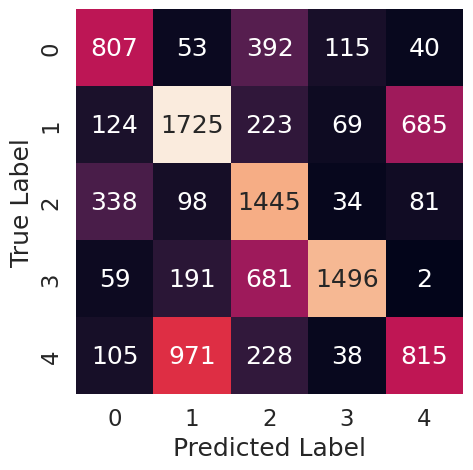

In [ ]:
conf_matrix(y_test, y_pred_ada)

**Model 4: KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors_settings=range(1,26) #KNN 25 times
for n_neighbors in neighbors_settings:
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train_s,y_train)

In [ ]:
knn.score(X_train_s,y_train)

0.7505670784444916

In [ ]:
y_pred_knn = knn.predict(X_test_s)
print(classification_report(y_test, y_pred_knn))

                precision    recall  f1-score   support

        Eating       0.64      0.70      0.67      1407
Speak and Walk       0.74      0.70      0.72      2826
      Speaking       0.68      0.71      0.69      1996
       Staying       0.83      0.94      0.88      2429
       Walking       0.72      0.58      0.64      2157

      accuracy                           0.73     10815
     macro avg       0.72      0.73      0.72     10815
  weighted avg       0.73      0.73      0.73     10815



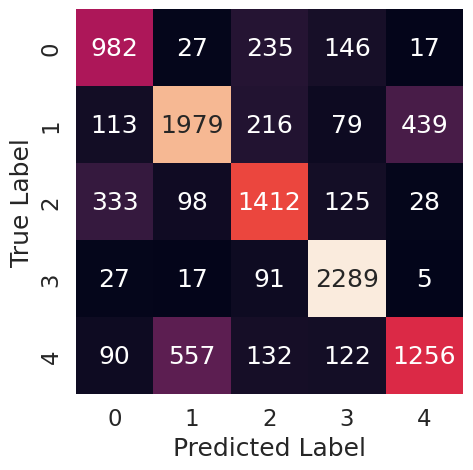

In [ ]:
conf_matrix(y_test, y_pred_knn)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBClassifier

Model 5: VotingClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [ ]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train_s,y_train)

In [ ]:
y_pred_eclf1 = eclf1.predict(X_test_s)
print(classification_report(y_test, y_pred_eclf1))

                precision    recall  f1-score   support

        Eating       0.57      0.84      0.68      1407
Speak and Walk       0.68      0.69      0.69      2826
      Speaking       0.66      0.59      0.62      1996
       Staying       0.90      0.96      0.93      2429
       Walking       0.68      0.47      0.55      2157

      accuracy                           0.71     10815
     macro avg       0.70      0.71      0.69     10815
  weighted avg       0.71      0.71      0.70     10815



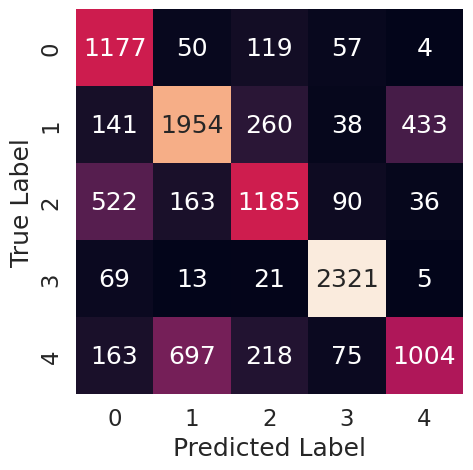

In [ ]:
conf_matrix(y_test, y_pred_eclf1)